<a href="https://colab.research.google.com/github/martinsadw/imersao-gemini-alura/blob/main/project_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q -O projects_data.csv https://raw.githubusercontent.com/martinsadw/imersao-gemini-alura/main/alura_projects.csv

In [2]:
# Baixa e atualiza a biblioteca necessária
!pip install -q -U google-generativeai

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import nltk
from nltk.corpus import stopwords

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
pt_stopwords = set(stopwords.words('portuguese'))
print(list(pt_stopwords)[:10])

['vos', 'estiverem', 'fôssemos', 'na', 'lhes', 'numa', 'nos', 'com', 'teria', 'era']


In [6]:
# Importa o Python SDK
import google.generativeai as genai
# Usado para obter a chave armazenada no Colab
from google.colab import userdata

# Obtem a chave armazenado com o nome 'GOOGLE_API_KEY' no Colab
# Lembrar de clicar no botão de switch para liberar o acesso para o notebook
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# 1. Ler os dados

In [7]:
projects_data = pd.read_csv('projects_data.csv', parse_dates=['enviado'])
projects_data

,autor,link,descricao,enviado,estrelas
0,André Luís Rodovalho Bezerra,https://github.com/andrelrb/Projeto_desafio_Im...,O AbrigoBot é um chatbot em Python que usa a i...,2024-05-12 01:17:00,3
1,Tales Câmara,https://github.com/TalesCamaraML/LLM_to_help_R...,O Reforço na Tempestade: Chatbot de Apoio às V...,2024-05-12 01:17:00,2
2,Lucas Pinhal Landim,https://github.com/lucasplandim/imersao_ai/blo...,"IAi, Vai Apostar? - Seu guia para apostas venc...",2024-05-12 01:17:00,2
3,Carlos Eduardo Do Nascimento Vieira,https://github.com/studantprogramat/C-digo---A...,Este modelo de chat em Python utiliza a podero...,2024-05-12 01:19:00,1
4,Henrique Gonçalves da Silva,https://github.com/henrique212g/Projeto_IA_Hen...,Histórias e meio ambiente: como podemos aprend...,2024-05-12 01:19:00,1
...,...,...,...,...,...
1479,Samuel Hernani Sander,https://github.com/SamuelSanderdev/abrigoAnimal,Descrição: SOS Abrigo Animal Sendo a comunicaç...,2024-05-12 01:44:00,1
1480,Matheus Andrade Pompermayer,https://github.com/MatheusAndrade07/MoneyIA,Uma ferramenta inovadora de gerenciamento de i...,2024-05-12 01:45:00,1
1481,Fabio Santana de Oliveira,https://github.com/fabio-agrosol/gerador-de-co...,O Gerador de Código oferece recursos para ajud...,2024-05-12 01:45:00,1
1482,ANDRÉ MANGANELLI GOMES,https://github.com/AndreManganelli/Chatbot-IA-...,Chatbot para Suporte técnico com criação de nú...,2024-05-12 01:46:00,1


In [8]:
projects_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   autor      1484 non-null   object        
 1   link       1483 non-null   object        
 2   descricao  1484 non-null   object        
 3   enviado    1484 non-null   datetime64[ns]
 4   estrelas   1484 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 58.1+ KB


In [9]:
projects_data.describe()

,enviado,estrelas
count,1484,1484.000000
mean,2024-05-11 07:42:43.989218048,7.773585
min,2024-05-09 12:34:00,1.000000
25%,2024-05-10 20:54:30,3.000000
50%,2024-05-11 14:06:30,4.000000
75%,2024-05-11 21:12:30,7.000000
max,2024-05-12 01:46:00,126.000000
std,NaN,12.792022


# 2. Análise dos dados

## 2.1. Autores de multiplos projetos

Alguns desses projetos foram apenas resubmissões do mesmo projeto

In [10]:
multi_projects_authors = projects_data[projects_data['autor'].duplicated(keep=False)].sort_values('autor')
print('Número de autores com mais de um projeto:', len(multi_projects_authors['autor'].unique()))
print('Número de projetos desses autores:', len(multi_projects_authors))

Número de autores com mais de um projeto: 49
Número de projetos desses autores: 110


In [11]:
multi_projects_authors

,autor,link,descricao,enviado,estrelas
1147,Anderson,https://github.com/A249999/CHAT_BOT_ALURA/blob...,CHAT_BOT_ALURA,2024-05-10 20:22:00,2
1093,Anderson,https://github.com/A249999/SISTEMA_DOCUMENTOS_...,SISTEMA_DOCUMENTOS_ALURA,2024-05-10 21:45:00,2
1366,Anderson,https://github.com/A249999/Projeto-aula-04/blo...,quickstart_colab.ipynb,2024-05-10 01:10:00,3
1069,André Ferreira Martins,https://github.com/martinsadw/brainstorm-helper,"Gere ideias inovadoras, refine-as e receba sug...",2024-05-10 21:06:00,5
670,André Ferreira Martins,https://github.com/martinsadw/imersao-gemini-a...,Notebook no Google Colab para analisar os proj...,2024-05-11 16:41:00,5
...,...,...,...,...,...
945,Wenderson Oscar Santos Silva,https://github.com/Wenderson-Oscar/VoiceGenie,O VoiceGenie é mais do que um assistente de vo...,2024-05-11 02:17:00,6
220,William Borges,https://github.com/Katedral99/Aula_Alura/blob/...,Gemini Prompt Framework,2024-05-11 23:08:00,1
228,William Borges,https://github.com/Katedral99/Aula_Alura/blob/...,Meu primeiro ChatBot ;),2024-05-11 23:13:00,2
757,angelo luiz,https://github.com/angelo-ops/chat-anti-plagio...,O bot antiplágio é um programa que usa IA para...,2024-05-11 13:51:00,3


## 2.2. Estrelas

In [12]:
num_projects = 30
projects_top = projects_data.sort_values('estrelas', ascending=False).head(num_projects)
print('Número médio de estrelas por projeto:', projects_data['estrelas'].mean())
print(f'Número de estrelas para estar entre os {num_projects} projetos mais populares:', projects_top['estrelas'].min())

Número médio de estrelas por projeto: 7.773584905660377
Número de estrelas para estar entre os 30 projetos mais populares: 58


In [13]:
projects_top

,autor,link,descricao,enviado,estrelas
1459,Giovanna da Silva de Oliveira,https://github.com/Giovanna-de-Oliveira/Portif...,O foco deste projeto é abordar a detecção do u...,2024-05-09 17:52:00,126
1442,Victor Verdoodt,https://github.com/victorverdoodt/Disaster-Res...,O projeto Disaster Response Coordinator é uma ...,2024-05-09 14:01:00,113
1321,Claudio César Martins,https://github.com/claudiocmm/My_Polyglot_App,Aprenda idiomas como nunca antes com My Polygl...,2024-05-10 04:33:00,95
1476,Laysa Maria Nascimento Alves,https://github.com/laysaalves/medgrandma-ai,Criei o MedGrandma.ai inspirado na minha vida ...,2024-05-09 19:35:00,92
1200,Kaled Freire Barreto,https://github.com/kaledbarreto/SophIA,"Olá pessoal! Sou a Sophia, a Sábia! Uma profe...",2024-05-10 19:09:00,92
1260,Tomas Rodrigues Alessi,https://github.com/alessitomas/EmpregoConnect,O EmpregoConnect é uma plataforma que conta co...,2024-05-10 12:42:00,91
1351,Bruno da Silva,https://github.com/bruninho-design/AjudaOSul.A...,O AjudaOSul.AI é um projeto de código aberto q...,2024-05-09 23:48:00,89
1001,Vinicius Silva,https://github.com/viniciusgdr/TomoriBOTGemini,TomoriBOT WhatsApp - Alimentado por IA O Tomor...,2024-05-11 00:51:00,85
1282,Mário Lúcio,https://github.com/marioluciofjr/projeto_alura,Imagina você lendo aquele papelzinho sem vergo...,2024-05-10 13:50:00,85
1030,Alielson Ferreira Pequeno,https://github.com/alielsonfp/DataGemini/tree/...,DataGemini é uma ferramenta poderosa que combi...,2024-05-10 22:44:00,82


In [14]:
fig = px.histogram(projects_data, x='estrelas', title='Histograma do número de estrelas')
fig.update_layout(xaxis_title='Número de estrelas', yaxis_title='Número de projetos')
fig.show()

## 2.3. Link do projeto

In [15]:
# Extrai o domínio dos links
projects_data['dominio'] = projects_data['link'].str.extract(r'https?://([^/]+)')
projects_data['dominio'].value_counts()

dominio
github.com                   1470
aistudio.google.com             3
gist.github.com                 2
1drv.ms                         1
kauecodify.github.io            1
cloud.google.com                1
colab.research.google.com       1
gemini.google.com               1
www.gitkraken.com               1
www.notion.so                   1
www.linkedin.com                1
Name: count, dtype: int64

In [16]:
# Extrai o nome do projeto do link do GitHub
projects_data['titulo'] = projects_data['link'].str.extract(r'https?://github.com/[^/]+/([^/]+)')

In [17]:
projects_data.query('dominio != "github.com"')

,autor,link,descricao,enviado,estrelas,dominio,titulo
6,Daniel Cesar Rodrigues da Costa,NaN,Chat bot simples feito no colab seguindo as au...,2024-05-12 01:21:00,1,NaN,NaN
78,Gustavo Luz Sônego,https://gist.github.com/GustavoLuzzz/849a66200...,Ajuda com matérias e trabalhos,2024-05-12 01:04:00,3,gist.github.com,NaN
175,Marcio Henrique de Oliveira,https://aistudio.google.com/app/apikey?utm_cam...,Centro Auditivo,2024-05-11 23:54:00,1,aistudio.google.com,NaN
215,Vitor Gabrie Lima Ferreira,https://aistudio.google.com/app/prompts?state=...,"Chatbot que te ajudar nos exercícios, atividad...",2024-05-11 23:05:00,1,aistudio.google.com,NaN
537,JOSÉ EVARISTO DA SILVA JÚNIOR,https://aistudio.google.com/app/prompts?state=...,UM CONTO DE UM GUERREIRO CHAMADO BERNARDO,2024-05-11 17:54:00,1,aistudio.google.com,NaN
697,joão ribeiro,https://1drv.ms/w/s!AlE7thG6w5Dkg1SCwCCe7u6iCm...,documento,2024-05-11 14:44:00,3,1drv.ms,NaN
844,Kaue caires dos santos souza,https://kauecodify.github.io/GeoPrevent/,GeoPrevent: O projeto GeoPrevent foi feito por...,2024-05-11 05:41:00,3,kauecodify.github.io,NaN
921,Rogéria Cilião Nassarden,https://cloud.google.com/innovators?hl=pt-br,Aprendendo e Inovando,2024-05-11 01:24:00,6,cloud.google.com,NaN
926,LUCIANE MARIA MICHELETTI TONON,https://colab.research.google.com/gist/luciane...,Primeira vez que mexo com programação na vida....,2024-05-11 01:34:00,10,colab.research.google.com,NaN
1136,Lavinia Matos,https://gemini.google.com/app,Proposta de viagem,2024-05-10 19:53:00,2,gemini.google.com,NaN


## 2.4. Descrição

In [18]:
projects_data['descricao_caracteres'] = projects_data['descricao'].str.len()
projects_data['descricao_palavras'] = projects_data['descricao'].apply(lambda row: len(row.split(' ')))

In [19]:
fig = px.histogram(projects_data, x='descricao_palavras', title='Histograma tamanho da descrição em palavras')
fig.update_layout(xaxis_title='Tamanho da descrição em palavras', yaxis_title='Número de projetos')
fig.show()

In [20]:
fig = px.scatter(projects_data, x='descricao_palavras', y='estrelas', title='Relação entre tamanho da descrição e número de estrelas')
fig.update_layout(xaxis_title='Tamanho da descrição em palavras', yaxis_title='Número de estrelas')
fig.show()

## 2.5 Data de envio

In [21]:
projects_sent = projects_data.set_index('enviado').sort_index().resample('1h')['estrelas'].mean()
fig = px.line(x=projects_sent.index, y=projects_sent, title='Número médio de estrelas por projeto')
fig.update_layout(xaxis_title='Horário', yaxis_title='Número médio de estrelas')
fig.show()

In [22]:
projects_data['enviado_hora'] = projects_data['enviado'].round('1h')

In [23]:
fig = px.scatter(projects_data, x='enviado', y='estrelas', title='Número de estrelas por projeto', opacity=0.7)
fig.update_layout(xaxis_title='Horário', yaxis_title='Número de estrelas')
fig.show()

## 2.6. Wordcloud

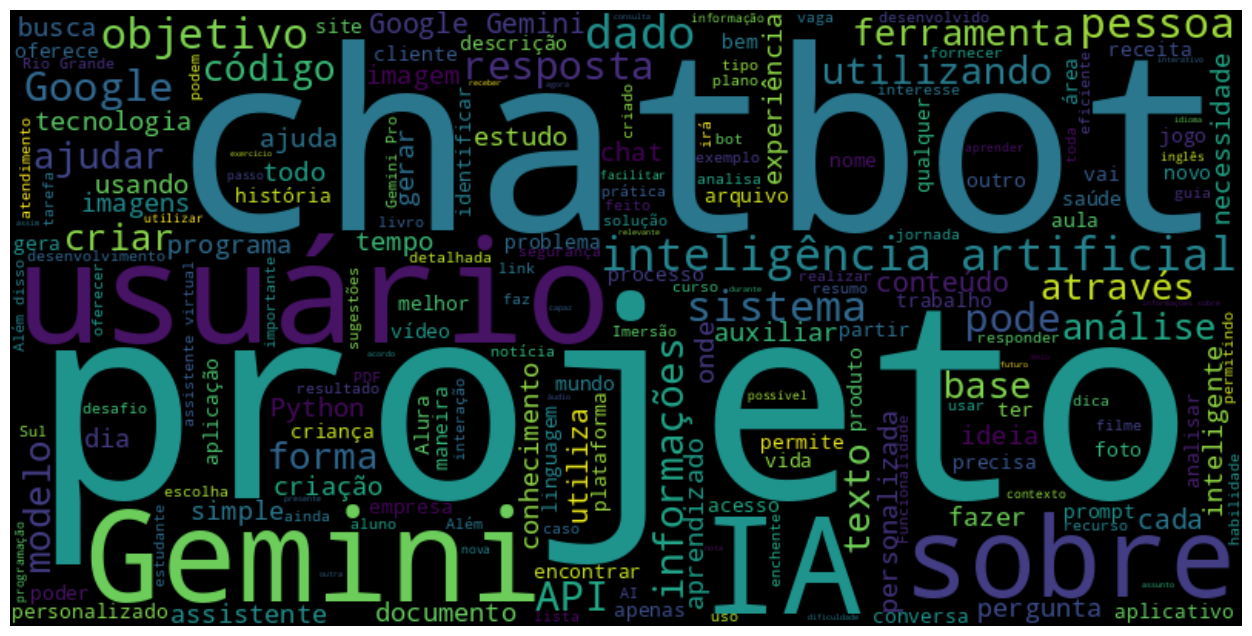

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=pt_stopwords, width=800, height=400).generate(' '.join(projects_data['descricao']))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
projects_data.head()

,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora
0,André Luís Rodovalho Bezerra,https://github.com/andrelrb/Projeto_desafio_Im...,O AbrigoBot é um chatbot em Python que usa a i...,2024-05-12 01:17:00,3,github.com,Projeto_desafio_Imersao_IA,499,83,2024-05-12 01:00:00
1,Tales Câmara,https://github.com/TalesCamaraML/LLM_to_help_R...,O Reforço na Tempestade: Chatbot de Apoio às V...,2024-05-12 01:17:00,2,github.com,LLM_to_help_RS_Brazil,1001,153,2024-05-12 01:00:00
2,Lucas Pinhal Landim,https://github.com/lucasplandim/imersao_ai/blo...,"IAi, Vai Apostar? - Seu guia para apostas venc...",2024-05-12 01:17:00,2,github.com,imersao_ai,452,76,2024-05-12 01:00:00
3,Carlos Eduardo Do Nascimento Vieira,https://github.com/studantprogramat/C-digo---A...,Este modelo de chat em Python utiliza a podero...,2024-05-12 01:19:00,1,github.com,C-digo---Aula-04,144,22,2024-05-12 01:00:00
4,Henrique Gonçalves da Silva,https://github.com/henrique212g/Projeto_IA_Hen...,Histórias e meio ambiente: como podemos aprend...,2024-05-12 01:19:00,1,github.com,Projeto_IA_HenriqueGS,677,107,2024-05-12 01:00:00


# 3. Embeddings

## 3.1. Criar os embeddings

In [26]:
def embed_text(text, model='models/embedding-001', task_type='CLUSTERING'):
    return genai.embed_content(model=model, content=text, task_type=task_type)['embedding']

In [27]:
# Cria os embedding
projects_data['embedding'] = projects_data['descricao'].apply(embed_text)
projects_data.head()

,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding
0,André Luís Rodovalho Bezerra,https://github.com/andrelrb/Projeto_desafio_Im...,O AbrigoBot é um chatbot em Python que usa a i...,2024-05-12 01:17:00,3,github.com,Projeto_desafio_Imersao_IA,499,83,2024-05-12 01:00:00,"[0.018026602, -0.028744716, -0.043631177, 0.02..."
1,Tales Câmara,https://github.com/TalesCamaraML/LLM_to_help_R...,O Reforço na Tempestade: Chatbot de Apoio às V...,2024-05-12 01:17:00,2,github.com,LLM_to_help_RS_Brazil,1001,153,2024-05-12 01:00:00,"[0.030309997, -0.022906253, -0.027443454, 0.04..."
2,Lucas Pinhal Landim,https://github.com/lucasplandim/imersao_ai/blo...,"IAi, Vai Apostar? - Seu guia para apostas venc...",2024-05-12 01:17:00,2,github.com,imersao_ai,452,76,2024-05-12 01:00:00,"[0.017854447, -0.013401626, -0.032655004, -0.0..."
3,Carlos Eduardo Do Nascimento Vieira,https://github.com/studantprogramat/C-digo---A...,Este modelo de chat em Python utiliza a podero...,2024-05-12 01:19:00,1,github.com,C-digo---Aula-04,144,22,2024-05-12 01:00:00,"[0.020854311, -0.050443575, -0.030224847, -0.0..."
4,Henrique Gonçalves da Silva,https://github.com/henrique212g/Projeto_IA_Hen...,Histórias e meio ambiente: como podemos aprend...,2024-05-12 01:19:00,1,github.com,Projeto_IA_HenriqueGS,677,107,2024-05-12 01:00:00,"[-0.019151704, -0.025607485, -0.03840691, 0.07..."


## 3.2. Criar a matriz de semelhança

In [28]:
projects_embeddings = np.stack(projects_data['embedding'])
projects_embeddings.shape

(1484, 768)

In [29]:
similarity = np.tensordot(projects_embeddings, projects_embeddings, (1, 1))
similarity.shape

(1484, 1484)

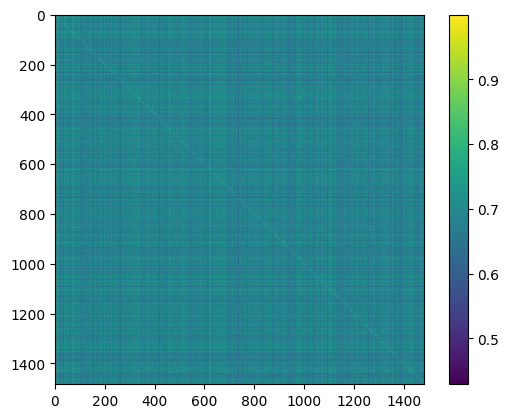

In [30]:
plt.imshow(similarity)
plt.colorbar()
plt.show()

# 4. Buscas e visualizações

## 4.1. Buscar por projetos similares procurando por autor

In [31]:
def search_similar_projects(project_id, quant=10):
    similar = similarity[project_id].argsort()[-quant-1:-1][::-1]
    similar_projects = projects_data.iloc[similar, :5]
    similar_projects.insert(0, 'semelhanca', similarity[project_id][similar])
    return similar_projects

In [32]:
search_autor = 'André Ferreira Martins'
project_id = projects_data.query('autor == @search_autor').index[0]
search_similar_projects(project_id)

,semelhanca,autor,link,descricao,enviado,estrelas
994,0.830480,Victor de Souza Santos,https://github.com/VictorSouza112/Imersao_IA_P...,Analisador de Semelhança de Documentos com Emb...,2024-05-11 00:30:00,15
1123,0.829345,Anderson de Carvalho,https://github.com/anderoak/projeto_consultor_ai,Consultor AI de Documentos PDF - Este projeto ...,2024-05-10 19:36:00,3
605,0.811978,Breno Alexander Braga Silva,https://github.com/Breno-Alexander/Projeto-Alura,PROJETO CRIANDO UM SISTEMA PARA BUSCA EM DOCUM...,2024-05-11 17:27:00,3
1214,0.811872,Pietro Ciccalè,https://github.com/PieCic/Challenge-Alura-Goog...,Criei um modelo de IA usando o conhecimento ad...,2024-05-10 15:25:00,3
1165,0.798777,Talison Amorim do Nascimento,https://github.com/TalisonAmorim/projeto_imers...,# Resumo Este projeto é resultado da participa...,2024-05-10 17:50:00,8
643,0.793371,Lucas da Silva Soares,https://github.com/arithama/Organizador-de-Ano...,Um organizador automático de anotações conecta...,2024-05-11 15:59:00,3
672,0.792828,Igor Brito Dos Santos,https://github.com/igorbrit0/Chatbot_Suporte_T...,Projeto baseado na 4° aula da imersão IA Alura...,2024-05-11 16:43:00,3
294,0.789083,Marcos Coimbra Franca,https://github.com/marcosfranca91/IA-ProjetoAu...,Chatbot criado com o Gemini na aula 04 da imer...,2024-05-11 21:31:00,3
321,0.789015,Ednilton Mariano Chaves,https://github.com/EdniltonChaves/Projeto_Imer...,Assistente de Estudos para alunos do Ensino Mé...,2024-05-11 21:55:00,5
509,0.787264,Matheus Ricardo Uihara Zingarelli,https://github.com/zingarelli/onde-eu-parei,Cansado de abandonar leituras por falta de tem...,2024-05-11 19:00:00,2


## 4.2. Redução de dimensionalidade

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(similarity)
projects_data['vis_x'] = vis_dims[:, 0]
projects_data['vis_y'] = vis_dims[:, 1]

In [34]:
def plot_similar(project_id):
    other_projects = projects_data.drop(project_id)

    hovertemplate = '<b>%{customdata[0]}</b><br>Autor: %{customdata[1]}<br>Link: %{customdata[2]}'
    custom_data = [
        other_projects['titulo'],
        other_projects['autor'],
        other_projects['link'],
    ]

    marker_data = [
        projects_data.iloc[project_id][['titulo','autor', 'link']]
    ]
    marker_x = [vis_dims[project_id][0]]
    marker_y = [vis_dims[project_id][1]]

    project_name = projects_data.iloc[project_id]['titulo']
    project_similarity = np.delete(similarity[project_id], project_id, axis=0)

    fig = px.scatter(other_projects, x='vis_x', y='vis_y', color=project_similarity, opacity=0.7,
                     custom_data=custom_data,
                     title=f'Semelhança com o projeto "{project_name}" (id={project_id})')

    fig.add_trace(go.Scatter(x=marker_x, y=marker_y, mode='markers', marker_symbol='star', marker_size=15,
                             hovertemplate=hovertemplate, customdata=marker_data))

    fig.update_traces(hovertemplate=hovertemplate)
    fig.update_layout(xaxis_title='X', yaxis_title='Y',
                      width=1000, height=1000, showlegend=False)
    fig.show()

In [35]:
plot_similar(project_id)

## 4.3. Clusterização

In [36]:
from sklearn.cluster import KMeans

n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(similarity);
projects_data['cluster'] = kmeans.labels_.astype(str)

In [37]:
hovertemplate = '<b>%{customdata[0]}</b><br>Autor: %{customdata[1]}<br>Link: %{customdata[2]}'
custom_data = [
    projects_data['titulo'],
    projects_data['autor'],
    projects_data['link'],
]

fig = px.scatter(projects_data, x='vis_x', y='vis_y', color='cluster', custom_data=custom_data,
                 category_orders={'cluster': [str(x) for x in range(n_clusters)]},
                 color_discrete_sequence=px.colors.qualitative.G10, opacity=0.7,
                 title=f'Clusterização dos projetos com {n_clusters} clusters')
fig.update_traces(hovertemplate=hovertemplate)
fig.update_layout(xaxis_title='X', yaxis_title='Y',
                  width=1000, height=1000, coloraxis_showscale=False)
fig.show()

## 4.4. Análise dos clusters

In [38]:
sorted(projects_data['cluster'].unique())

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [39]:
projects_clusters = [projects_data.query('cluster == @i') for i in sorted(projects_data['cluster'].unique())]

print('Tamanho dos clusters:')
for i, cluster in enumerate(projects_clusters):
    print(f'Cluster {i}: {len(cluster)} projetos')

Tamanho dos clusters:
Cluster 0: 170 projetos
Cluster 1: 190 projetos
Cluster 2: 99 projetos
Cluster 3: 89 projetos
Cluster 4: 199 projetos
Cluster 5: 35 projetos
Cluster 6: 174 projetos
Cluster 7: 233 projetos
Cluster 8: 198 projetos
Cluster 9: 97 projetos


In [40]:
# Define parametros do modelo
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 0,
    "max_output_tokens": 8192,
}

In [41]:
# Define as configurações de segurança
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

In [42]:
# Instancia o modelo com as configurações especificadas
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

In [43]:
prompt = 'Eu tenho um dataset com inumeros projetos que utilizam o modelo Gemini para resolver problemas de diversas áreas. Eu executei um algoritmo de clusterização e separei esses projetos em clusters. O texto a seguir é a combinação da descrição de cada projeto separado por "---". Quero que tente identificar qual a carecteristica comum dos projetos desse cluster. Seja o mais específico possível mas mantenha a resposta à no máximo algumas palavras. Não adicione nenhuma informação extra à resposta:\n'

In [44]:
def cluster_summary(num):
    print(f'Cluster {num}: {len(projects_clusters[num])} projetos')
    answer = model.generate_content(prompt + '\n---\n'.join(projects_clusters[num]['descricao']))
    print(answer.text)
    display(projects_clusters[num].sort_values('estrelas', ascending=False).head())
    return answer.text

In [45]:
clusters_description = [''] * n_clusters

In [46]:
clusters_description[0] = cluster_summary(0)

Cluster 0: 170 projetos
Chatbots com IA para diversas áreas. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
1321,Claudio César Martins,https://github.com/claudiocmm/My_Polyglot_App,Aprenda idiomas como nunca antes com My Polygl...,2024-05-10 04:33:00,95,github.com,My_Polyglot_App,692,104,2024-05-10 05:00:00,"[0.026042726, -0.017974121, -0.0053990707, 0.0...",-2.659922,-39.713932,0
1200,Kaled Freire Barreto,https://github.com/kaledbarreto/SophIA,"Olá pessoal! Sou a Sophia, a Sábia! Uma profe...",2024-05-10 19:09:00,92,github.com,SophIA,610,104,2024-05-10 19:00:00,"[0.057751894, -0.02530945, -0.017982585, -0.02...",9.384808,-44.424965,0
1476,Laysa Maria Nascimento Alves,https://github.com/laysaalves/medgrandma-ai,Criei o MedGrandma.ai inspirado na minha vida ...,2024-05-09 19:35:00,92,github.com,medgrandma-ai,673,107,2024-05-09 20:00:00,"[0.020860605, -0.016272252, -0.017882077, 0.01...",3.044563,29.438559,0
1260,Tomas Rodrigues Alessi,https://github.com/alessitomas/EmpregoConnect,O EmpregoConnect é uma plataforma que conta co...,2024-05-10 12:42:00,91,github.com,EmpregoConnect,354,49,2024-05-10 13:00:00,"[0.030737696, -0.058653917, -0.03310471, -0.01...",-37.955967,-17.446295,0
1001,Vinicius Silva,https://github.com/viniciusgdr/TomoriBOTGemini,TomoriBOT WhatsApp - Alimentado por IA O Tomor...,2024-05-11 00:51:00,85,github.com,TomoriBOTGemini,1017,151,2024-05-11 01:00:00,"[0.060551994, -0.06144509, -0.022015797, 0.005...",-23.105591,-35.823769,0


In [47]:
clusters_description[1] = cluster_summary(1)

Cluster 1: 190 projetos
Assistentes virtuais com foco em tarefas específicas. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
873,Pedro Lucas Corrêa Oliveira,https://github.com/pedro-lucaspyt/ChronoWrite-...,ChronoWrite: A História Nunca Foi Tão Flexíve...,2024-05-11 02:53:00,77,github.com,ChronoWrite-AI-Storyteller,979,148,2024-05-11 03:00:00,"[0.03104858, -0.0050365594, -0.040122375, 0.00...",52.390621,-30.235361,1
1021,Gabriel Centeio Freitas,https://github.com/GabrielCenteioFreitas/FindT...,Tailwind CSS é um framework CSS que visa a uti...,2024-05-10 22:28:00,75,github.com,FindTheClosestTailwindColors-v2,928,151,2024-05-10 22:00:00,"[0.041940473, -0.030344168, -0.054041374, -0.0...",46.161594,-18.322330,1
927,Eduardo Freitas,https://github.com/eduardoboca/YouTubeClipper,YouTubeClipper é uma ferramenta que facilita a...,2024-05-11 01:39:00,72,github.com,YouTubeClipper,102,17,2024-05-11 02:00:00,"[0.02722317, -0.035697084, -0.037199467, 0.002...",52.912464,-23.110462,1
861,Rafael Neres Lima,https://github.com/rafanereslima/KidsTV-iOS,"Crianças são exploradoras natas, famintas por ...",2024-05-11 06:54:00,36,github.com,KidsTV-iOS,612,105,2024-05-11 07:00:00,"[0.013389735, -0.0036141821, -0.053120323, 0.0...",51.101112,-29.765829,1
1121,Enzo Frazão Vencio,https://github.com/EnzoFrazao/Project_IA,Guia de Viagens IA.,2024-05-10 19:29:00,22,github.com,Project_IA,19,4,2024-05-10 19:00:00,"[0.02195859, -0.013210449, -0.035613008, -0.05...",36.013664,-33.223549,1


In [48]:
clusters_description[2] = cluster_summary(2)

Cluster 2: 99 projetos
Chatbots com Google Gemini. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
976,Thyago Jesus,https://github.com/thyagojesus/Melhorar-casos-N1,Olá Analista de Suporte. Este projeto utiliza ...,2024-05-10 23:58:00,47,github.com,Melhorar-casos-N1,250,41,2024-05-11 00:00:00,"[0.027634358, -0.036892854, -0.027464697, 0.02...",-10.704281,63.866394,2
645,Gustavo Bispo Cordeiro,https://github.com/bispado/ChatBot_Maeth-,O projeto Maithê Ai é um chat bot integrado co...,2024-05-11 16:02:00,33,github.com,ChatBot_Maeth-,484,79,2024-05-11 16:00:00,"[0.04546827, -0.043020852, -0.048175253, -0.00...",-40.750675,36.137474,2
971,Pedro Henrique da Cunha Alves,https://github.com/PedroCunha06/Bot_AI,O BotAI é um chatbot que usa a tecnologia de I...,2024-05-10 23:46:00,31,github.com,Bot_AI,133,24,2024-05-11 00:00:00,"[0.062029805, -0.06407039, -0.016021138, 0.024...",-50.033115,42.825333,2
813,Kauê Cezário Cunha,https://github.com/kcezario/conhecimento_acess...,Um protótipo de assistente inclusivo com Gemin...,2024-05-11 12:45:00,26,github.com,conhecimento_acessivel,268,43,2024-05-11 13:00:00,"[0.054563858, -0.01942509, -0.04891283, 0.0308...",-14.097498,63.479210,2
1430,Adilmar Coelho Dantas,https://github.com/Adilmar/Michelzinho-Gemini,Michelzinho: O Michelzinho é um chatbot inovad...,2024-05-09 23:23:00,25,github.com,Michelzinho-Gemini,408,57,2024-05-09 23:00:00,"[0.027862834, -0.044889975, -0.0351585, 0.0266...",-37.400883,30.625792,2


In [50]:
clusters_description[3] = cluster_summary(3)

Cluster 3: 89 projetos
Aplicações do Google Gemini. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
1282,Mário Lúcio,https://github.com/marioluciofjr/projeto_alura,Imagina você lendo aquele papelzinho sem vergo...,2024-05-10 13:50:00,85,github.com,projeto_alura,627,101,2024-05-10 14:00:00,"[-0.011631613, -0.010615024, -0.024596896, 0.0...",36.665272,40.642612,3
733,Thiago Felipe Alves do Carmo,https://github.com/Oracle-of-Delfos/Arcane-Ins...,Sempre quis começar a jogar RPGs de mesa mas n...,2024-05-11 13:16:00,67,github.com,Arcane-Insight,330,59,2024-05-11 13:00:00,"[0.044025145, -0.023866149, -0.021882903, 0.03...",30.757940,38.537811,3
1233,Victor Hugo Aranda Forte,https://github.com/Blue260910/traveler-planner...,O Traveler Planner Site é um projeto integrado...,2024-05-10 16:34:00,42,github.com,traveler-planner-site,265,44,2024-05-10 17:00:00,"[0.033688474, -0.021516927, -0.05901748, 0.006...",28.804379,56.800419,3
1418,Marcos Valério de Almeida Nunes,https://github.com/marcosnunesmbs/mynextread,Quem nunca terminou de ler um livro e ficou na...,2024-05-09 22:14:00,41,github.com,mynextread,523,96,2024-05-09 22:00:00,"[0.016944299, 0.0050615636, -0.023896076, 0.00...",37.210796,36.928383,3
1083,Manuel Filipe Pedro,https://github.com/Manuel-Pedro/imersaoIA-alun...,Hodvats IA: Transformando Dados em Insights co...,2024-05-10 21:23:00,36,github.com,imersaoIA-aluna-google,1021,145,2024-05-10 21:00:00,"[0.03136553, -0.052650187, -0.04005855, 0.0255...",23.164560,35.482784,3


In [51]:
clusters_description[4] = cluster_summary(4)

Cluster 4: 199 projetos
Aplicações com Google Gemini. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
1442,Victor Verdoodt,https://github.com/victorverdoodt/Disaster-Res...,O projeto Disaster Response Coordinator é uma ...,2024-05-09 14:01:00,113,github.com,Disaster-Response-Coordinator,427,60,2024-05-09 14:00:00,"[0.010692242, -0.015391236, -0.027628016, 0.02...",6.817524,63.949203,4
1030,Alielson Ferreira Pequeno,https://github.com/alielsonfp/DataGemini/tree/...,DataGemini é uma ferramenta poderosa que combi...,2024-05-10 22:44:00,82,github.com,DataGemini,620,87,2024-05-10 23:00:00,"[0.034931958, -0.021008264, -0.0443244, 0.0201...",19.882433,49.605141,4
1434,Cleobeto Junior,https://github.com/jrmesquita7/ementario_gemini/,Este projeto consiste em um prompt criado com ...,2024-05-09 23:34:00,75,github.com,ementario_gemini,807,132,2024-05-10 00:00:00,"[0.031556904, -0.037256505, -0.01716714, 0.014...",-9.246935,67.947998,4
1028,Edijanio de Souza Barros,https://github.com/edijaniosouza/resume-analyser,Aplicativo Android com foco com objetivo de aj...,2024-05-10 22:41:00,49,github.com,resume-analyser,337,57,2024-05-10 23:00:00,"[0.034598902, -0.024595935, -0.029706309, 0.01...",-2.202322,52.722240,4
1268,Marcos José Guedes Júnior,https://github.com/programecomguedes/InspecaoV...,O Car Inspection AI é uma solução que utiliza ...,2024-05-10 13:07:00,47,github.com,InspecaoVeicularPythonGoogleGemini,449,69,2024-05-10 13:00:00,"[0.022842199, -0.0047318665, -0.031363074, 0.0...",21.716785,45.109417,4


In [52]:
clusters_description[5] = cluster_summary(5)

Cluster 5: 35 projetos
Chatbots e assistentes de IA. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
834,Talita Gomes Lisboa Piccolo,https://github.com/TalyLisboa/Jedai_Talita_Lis...,IA Jedai,2024-05-11 05:13:00,15,github.com,Jedai_Talita_Lisboa_ChatBot_Imersao,8,2,2024-05-11 05:00:00,"[0.01317584, -0.016070254, -0.008346249, -0.04...",56.151024,-59.499382,5
958,Maximo Moreno,https://github.com/More-Apps/gemini,This Ruby gem identifies the input field withi...,2024-05-11 02:31:00,7,github.com,gemini,265,41,2024-05-11 03:00:00,"[0.031747356, -0.06331587, -0.0338746, -0.0128...",53.104019,-57.429153,5
874,Marcillio Mattos Chaves,https://github.com/CiMattosCH/Imersao_IA_Proje...,O que fazer após uma parada cardiorrespiratória,2024-05-11 02:54:00,7,github.com,Imersao_IA_Projeto1,47,7,2024-05-11 03:00:00,"[0.026837584, -0.013812138, -0.018028174, -0.0...",51.849983,-50.758850,5
1445,Paulo Gabriel Silva,https://github.com/pagasiyt/ChatBot,.,2024-05-09 14:29:00,5,github.com,ChatBot,1,1,2024-05-09 14:00:00,"[0.021532567, -0.053240657, -0.015618722, -0.0...",56.875385,-52.084290,5
152,Elaine LeaL Burock,https://github.com/Digital-Verde/HarmonyFlick,Filmes Perfeitos! Cansado de debates sobre qu...,2024-05-11 23:27:00,5,github.com,HarmonyFlick,181,33,2024-05-11 23:00:00,"[0.02945936, -0.013538338, -0.05104133, 0.0093...",50.522583,-50.159897,5


In [55]:
clusters_description[6] = cluster_summary(6)

Cluster 6: 174 projetos
Auxílio e suporte em diversas áreas. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
1351,Bruno da Silva,https://github.com/bruninho-design/AjudaOSul.A...,O AjudaOSul.AI é um projeto de código aberto q...,2024-05-09 23:48:00,89,github.com,AjudaOSul.AI-ImersaoAlura,349,56,2024-05-10 00:00:00,"[0.016232997, -0.024508756, -0.04338939, 0.006...",-37.030193,0.958464,6
1207,Maryane de Castro Lima,https://github.com/maryane-castro/chatbot-fi,O projeto consiste em um ChatBot desenvolvido ...,2024-05-10 14:45:00,76,github.com,chatbot-fi,1006,141,2024-05-10 15:00:00,"[0.015483367, -0.025418824, -0.04535009, 0.021...",-55.508842,4.606616,6
969,Anna Giulia Pereira Verissimo Ferreira,https://github.com/GIIUPEREIRA/Imersao_Alura_P...,O projeto Alerta Máximo: O chatbot que te guia...,2024-05-10 23:42:00,75,github.com,Imersao_Alura_Projeto,636,99,2024-05-11 00:00:00,"[0.015990727, -0.0038171278, -0.03182293, 0.02...",-37.865124,2.442026,6
1310,Lucas Miranda da Silva,https://github.com/LucasMiranda7/projetoMesa_C...,Mesa Compartilhada um Projeto/Campanha que vis...,2024-05-10 02:56:00,68,github.com,projetoMesa_Compartilhada,1020,169,2024-05-10 03:00:00,"[0.046021372, -0.028485065, -0.056054503, 0.01...",-39.495029,2.939170,6
856,Nickolas Lima Ferreira,https://github.com/nickolasL13/gemini_ai/tree/...,Este projeto tem como objetivo a criação de um...,2024-05-11 06:31:00,68,github.com,gemini_ai,257,38,2024-05-11 07:00:00,"[0.026763156, -0.05757814, -0.054402635, -0.01...",-63.328167,4.051863,6


In [56]:
clusters_description[7] = cluster_summary(7)

Cluster 7: 233 projetos
Assistentes Virtuais e Chatbots 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
1459,Giovanna da Silva de Oliveira,https://github.com/Giovanna-de-Oliveira/Portif...,O foco deste projeto é abordar a detecção do u...,2024-05-09 17:52:00,126,github.com,Portifolio,385,65,2024-05-09 18:00:00,"[0.021195045, 0.021553503, -0.037690286, 0.013...",18.374422,16.098248,7
1235,João Paulo,https://github.com/jpos92/projeto_imersao_ia,Indentificador de fraudes em processos licitat...,2024-05-10 16:37:00,69,github.com,projeto_imersao_ia,51,6,2024-05-10 17:00:00,"[0.017602663, -0.025530767, -0.031596933, -0.0...",24.967884,-16.637274,7
1253,Thais Santana Santos,https://github.com/YARKGRIS/REDA-O-ENEM.git,Meu projeto é sobre a redação do ENEM . Onde e...,2024-05-10 17:37:00,58,github.com,REDA-O-ENEM.git,79,16,2024-05-10 18:00:00,"[-0.0036361082, -0.020605098, -0.062350724, 0....",37.129539,-6.152013,7
996,Radirley Fernandes,https://github.com/R4dy/PersonalVacation,Personal Vacation - O Seu Agente de Viagens De...,2024-05-11 00:46:00,56,github.com,PersonalVacation,452,82,2024-05-11 01:00:00,"[0.007552528, -0.02559705, -0.046549756, 0.009...",14.905254,-13.043547,7
534,Alef Amazonas Batista,https://github.com/alefbatista1/Tradutor-YANOM...,Tradutor de palavras yanomami para português c...,2024-05-11 19:29:00,53,github.com,Tradutor-YANOMAMI-PORTUGU-S.git,102,17,2024-05-11 19:00:00,"[0.018239915, -0.012231538, -0.03150763, 0.019...",26.175404,-7.097122,7


In [57]:
clusters_description[8] = cluster_summary(8)

Cluster 8: 198 projetos
Assistentes virtuais com IA. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
1343,Anderson Pacheco,https://github.com/estimulaai/projeto,Descubra o EstimulaAI - inspirado pela jornad...,2024-05-10 11:12:00,58,github.com,projeto,481,76,2024-05-10 11:00:00,"[0.007463186, -0.002899275, -0.040773727, 0.02...",-14.686098,22.362577,8
702,Yohanna de Oliveira Cavalcanti,https://github.com/8b1tz/climate_risk_analyzer,O projeto consiste em um gerador automatizado ...,2024-05-11 14:55:00,53,github.com,climate_risk_analyzer,795,119,2024-05-11 15:00:00,"[-0.0086854, -0.026489783, -0.030475983, 0.036...",-0.856051,23.925247,8
1101,Alicia Faria,https://github.com/nearbykatayama/GooRecipe,"Olá pessoal! Para o meu projeto final, eu crie...",2024-05-10 21:55:00,52,github.com,GooRecipe,1019,184,2024-05-10 22:00:00,"[0.012485191, -0.04258527, -0.021961538, -0.01...",-30.705084,-17.781305,8
1264,Vinícius Pereira Martins,https://github.com/ViniPMartins/AI-language-te...,Que tal um Professor de Linguas Particular? Es...,2024-05-10 12:51:00,37,github.com,AI-language-teacher,287,46,2024-05-10 13:00:00,"[0.019390246, -0.03764713, -0.023575425, 0.001...",-21.967571,0.179854,8
804,Bruno Martins dos Santos,https://github.com/bnomartins/JarvisParaSa-de,O projeto Jarvis para a saúde é um projeto des...,2024-05-11 12:20:00,31,github.com,JarvisParaSa-de,1022,180,2024-05-11 12:00:00,"[0.02234172, -0.04072212, -0.032030355, 0.0366...",3.181235,29.646629,8


In [59]:
clusters_description[9] = cluster_summary(9)

Cluster 9: 97 projetos
Chatbots de diversas áreas. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
1037,Ellen Karolina do Couto Gomes de Oliveira,https://github.com/EllenKarolina1/projeto-imer...,Chatbot que entrega copy de criativos de socia...,2024-05-10 22:57:00,80,github.com,projeto-imersao-alura-com-google,100,16,2024-05-10 23:00:00,"[0.058473844, -0.094236515, -0.03353368, -0.02...",-48.752106,-32.256081,9
566,Cristiano Santos,https://github.com/IAmCristiano/GokuAI,Chatbot para falar com o Goku! Totalmente amig...,2024-05-11 18:19:00,68,github.com,GokuAI,394,62,2024-05-11 18:00:00,"[0.044910308, -0.06372104, -0.04834496, -0.012...",-41.794617,-31.768206,9
1067,Tatiany de Souza Albuquerque,https://github.com/tatianysouza/FitBot.git,FitBot é um chatbot de treinamento físico dese...,2024-05-10 21:03:00,24,github.com,FitBot.git,543,89,2024-05-10 21:00:00,"[0.03516564, -0.00018728721, -0.018166427, 0.0...",-28.820524,-36.316212,9
766,Bruno Cesar Alves Castro,https://github.com/brunocastro/plant_ai,Plant_AI: O Chatbot pra quem tem paixão por pl...,2024-05-11 14:11:00,22,github.com,plant_ai,77,15,2024-05-11 14:00:00,"[0.046896063, -0.033145644, -0.02519873, -0.03...",-36.682598,-34.374977,9
1192,Alan Schmitt,https://github.com/oAlanSchmitt/CatalogAI/tree...,"Um simples chatbot para recomendar series, fil...",2024-05-10 18:57:00,19,github.com,CatalogAI,82,14,2024-05-10 19:00:00,"[0.055222202, -0.039183076, -0.0054323785, 0.0...",-53.068798,-26.784744,9


In [60]:
clusters_description

['Chatbots com IA para diversas áreas. \n',
 'Assistentes virtuais com foco em tarefas específicas. \n',
 'Chatbots com Google Gemini. \n',
 'Aplicações do Google Gemini. \n',
 'Aplicações com Google Gemini. \n',
 'Chatbots e assistentes de IA. \n',
 'Auxílio e suporte em diversas áreas. \n',
 'Assistentes Virtuais e Chatbots \n',
 'Assistentes virtuais com IA. \n',
 'Chatbots de diversas áreas. \n']